<a href="https://colab.research.google.com/github/Mbigdeli2003/DNN_training/blob/main/NN_TA_session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

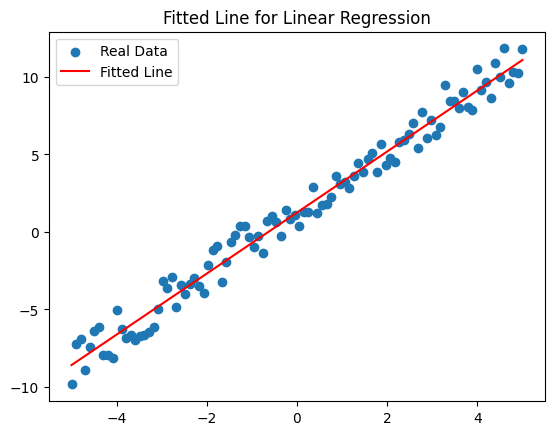

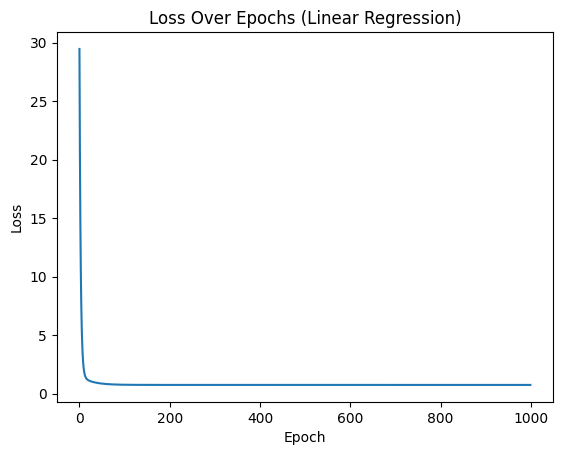

In [6]:
import torch
import matplotlib.pyplot as plt

# تولید داده‌های ساختگی با استفاده از PyTorch
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)  # ورودی
y = 2*X + 3 * torch.rand(X.size())  # خروجی با نویز

# پارامترهای مدل رگرسیون خطی
w = torch.randn(1, requires_grad=True)  # وزن اولیه
b = torch.randn(1, requires_grad=True)  # بایاس اولیه
learning_rate = 0.01
num_epochs = 1000

# تابع خطا از نوع MSE
criterion = torch.nn.MSELoss()

# ذخیره مقادیر loss
losses = torch.zeros(num_epochs)

# حلقه آموزش رگرسیون خطی
for epoch in range(num_epochs):
    # پیش‌بینی با مدل خطی
    y_pred = X * w + b

    # محاسبه خطا (MSE)
    loss = criterion(y_pred, y)

    # محاسبه گرادیان‌ها
    loss.backward()

    # بروزرسانی پارامترها
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # صفر کردن گرادیان‌ها
    w.grad.zero_()
    b.grad.zero_()

    # ذخیره مقدار loss
    losses[epoch] = loss

# نمایش خط رگرسیون با استفاده از PyTorch
with torch.no_grad():
    predicted = X * w + b
    plt.scatter(X.numpy(), y.numpy(), label='Real Data')
    plt.plot(X.numpy(), predicted.numpy(), 'r', label='Fitted Line')
    plt.legend()
    plt.title('Fitted Line for Linear Regression')
    plt.show()

# رسم نمودار loss با PyTorch
plt.plot(losses.detach().numpy())  # استفاده از detach() برای جدا کردن از محاسبات گرادیان
plt.title('Loss Over Epochs (Linear Regression)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


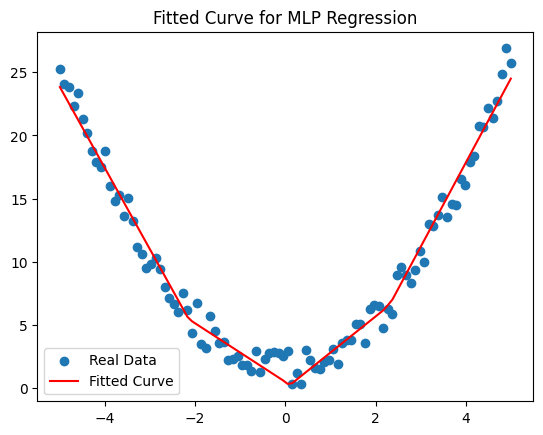

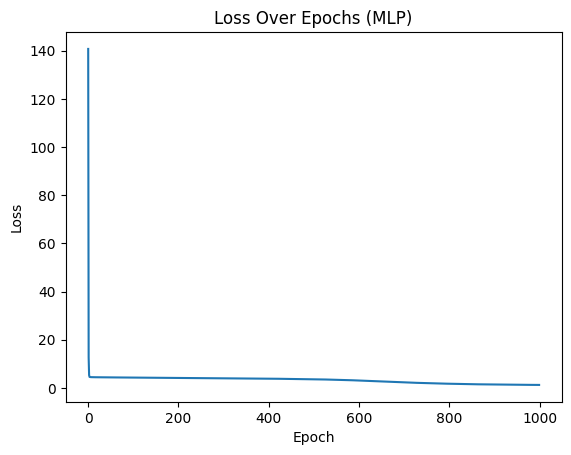

In [5]:
# تولید داده‌های غیرخطی برای MLP با PyTorch
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)  # ورودی
y = X.pow(2) + 3 * torch.rand(X.size())  # خروجی با نویز

# پارامترهای مدل MLP
w1 = torch.randn(1, 10, requires_grad=True)  # وزن‌های لایه ورودی به مخفی
b1 = torch.randn(10, requires_grad=True)     # بایاس‌های لایه مخفی
w2 = torch.randn(10, 1, requires_grad=True)  # وزن‌های لایه مخفی به خروجی
b2 = torch.randn(1, requires_grad=True)      # بایاس لایه خروجی

# نرخ یادگیری و تعداد تکرار
learning_rate = 0.01
num_epochs = 1000

# تابع خطا از نوع MSE برای رگرسیون
criterion = torch.nn.MSELoss()

# ذخیره مقادیر loss
losses_mlp = torch.zeros(num_epochs)

# حلقه آموزش MLP
for epoch in range(num_epochs):
    # لایه مخفی با تابع فعال‌سازی ReLU با استفاده از PyTorch
    hidden = torch.relu(X.mm(w1) + b1)

    # لایه خروجی
    y_pred = hidden.mm(w2) + b2

    # محاسبه خطا (MSE)
    loss = criterion(y_pred, y)

    # محاسبه گرادیان‌ها
    loss.backward()

    # بروزرسانی پارامترها
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad

    # صفر کردن گرادیان‌ها
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()

    # ذخیره مقدار loss
    losses_mlp[epoch] = loss

# نمایش پیش‌بینی‌های MLP با استفاده از PyTorch
with torch.no_grad():
    predicted = hidden.mm(w2) + b2
    plt.scatter(X.numpy(), y.numpy(), label='Real Data')
    plt.plot(X.numpy(), predicted.numpy(), 'r', label='Fitted Curve')
    plt.legend()
    plt.title('Fitted Curve for MLP Regression')
    plt.show()

# رسم نمودار loss با استفاده از PyTorch
plt.plot(losses_mlp.detach().numpy())  # استفاده از detach() برای جدا کردن از محاسبات گرادیان
plt.title('Loss Over Epochs (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


#MNIST

In [7]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from keras.datasets import mnist
(images, labels), (test_X, test_y) = mnist.load_data()

plotting

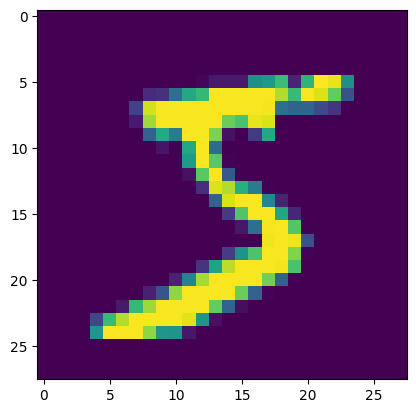

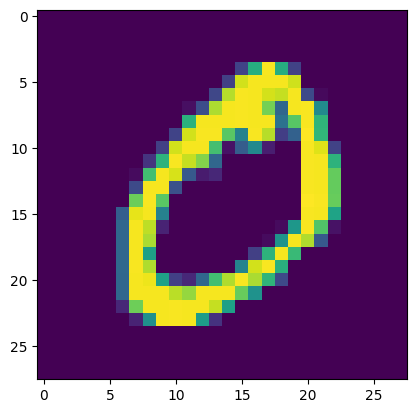

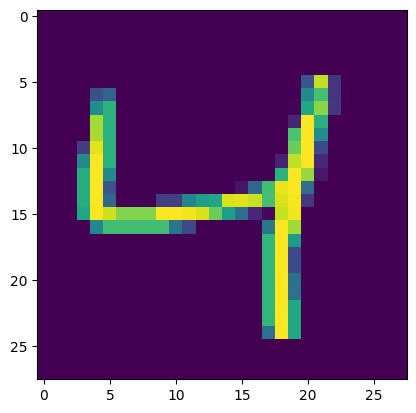

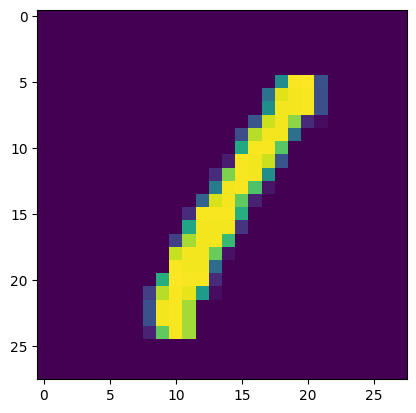

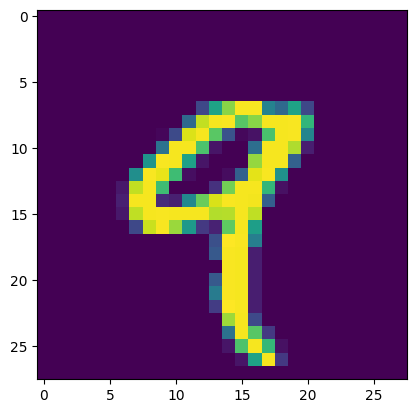

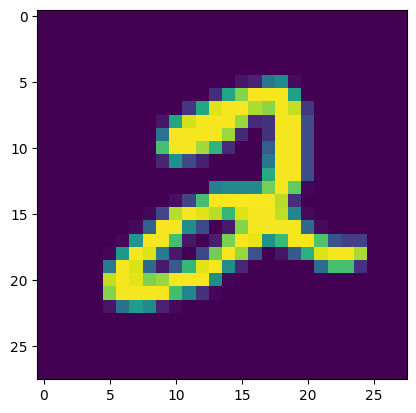

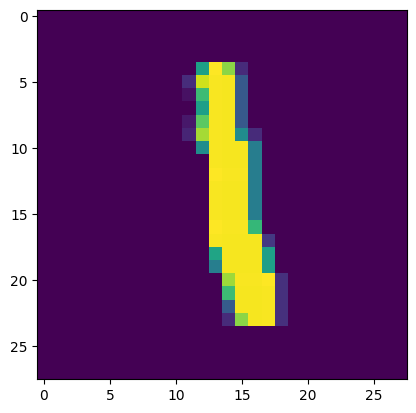

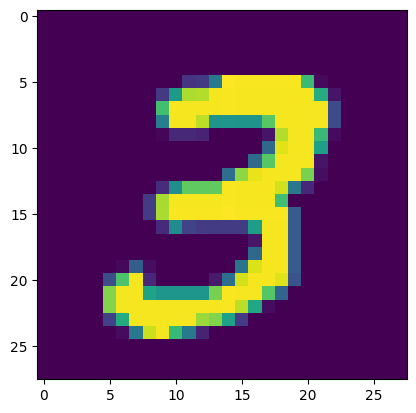

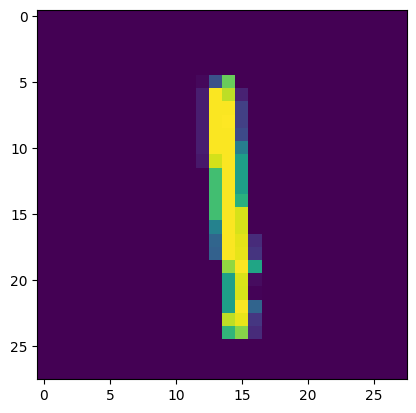

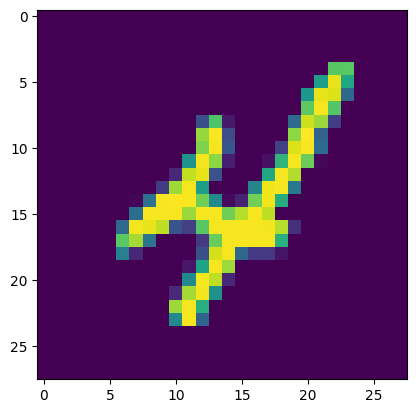

In [8]:
for i in range(10):
 plt.imshow(images[i])
 plt.show()

Gray plotting

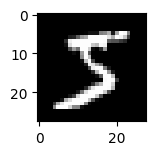

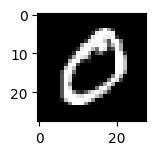

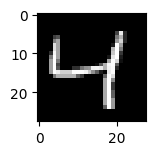

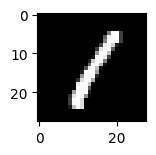

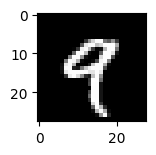

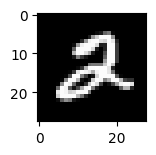

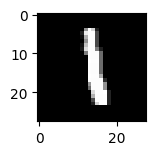

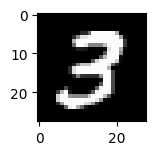

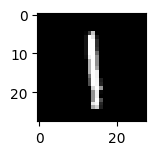

In [9]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(images[i], cmap=plt.get_cmap('gray'))
 plt.show()

##Training 28*28

In [10]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from keras.datasets import mnist
(images, labels), (test_X, test_y) = mnist.load_data()

Epoch [1/10], Step [100/938], Loss: 1.9703
Epoch [1/10], Step [200/938], Loss: 1.8189
Epoch [1/10], Step [300/938], Loss: 1.8062
Epoch [1/10], Step [400/938], Loss: 1.7545
Epoch [1/10], Step [500/938], Loss: 1.7047
Epoch [1/10], Step [600/938], Loss: 1.7028
Epoch [1/10], Step [700/938], Loss: 1.6958
Epoch [1/10], Step [800/938], Loss: 1.7247
Epoch [1/10], Step [900/938], Loss: 1.6929
Epoch [2/10], Step [100/938], Loss: 1.7338
Epoch [2/10], Step [200/938], Loss: 1.6854
Epoch [2/10], Step [300/938], Loss: 1.6828
Epoch [2/10], Step [400/938], Loss: 1.6359
Epoch [2/10], Step [500/938], Loss: 1.6790
Epoch [2/10], Step [600/938], Loss: 1.6094
Epoch [2/10], Step [700/938], Loss: 1.6707
Epoch [2/10], Step [800/938], Loss: 1.6763
Epoch [2/10], Step [900/938], Loss: 1.6967
Epoch [3/10], Step [100/938], Loss: 1.6342
Epoch [3/10], Step [200/938], Loss: 1.6442
Epoch [3/10], Step [300/938], Loss: 1.7023
Epoch [3/10], Step [400/938], Loss: 1.6233
Epoch [3/10], Step [500/938], Loss: 1.6394
Epoch [3/10

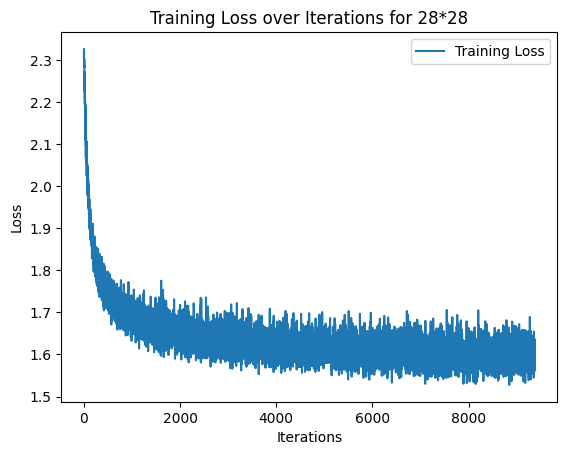

Test Error for 28*28: %10.199999999999998


In [11]:
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model = nn.Sequential(nn.Linear(in_features=input_features, out_features=output_features),
                      nn.Sigmoid())
loss_fn = nn.CrossEntropyLoss()
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 10
total_step = len(train_loader)
learning_rate = 0.01

loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        model.zero_grad()
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param-=learning_rate*param.grad

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Append loss for plotting
        loss_values.append(loss.item())


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##Visulization template

In [ ]:
# Visualization Template for Students

# 1. Track and plot training error over epochs for both datasets
def plot_training_error(training_errors_28x28, training_errors_7x7, test_errors_28x28, test_errors_7x7):
    """
    Plot the training and test errors over epochs for both the original 28x28 dataset
    and the downscaled 7x7 dataset. This helps visualize how well the model is learning
    over time.

    Parameters:
    training_errors_28x28 (list): List of training errors (1 - accuracy) for the 28x28 dataset over epochs.
    training_errors_7x7 (list): List of training errors (1 - accuracy) for the 7x7 dataset over epochs.
    test_errors_28x28 (list): List of test errors for the 28x28 dataset over epochs.
    test_errors_7x7 (list): List of test errors for the 7x7 dataset over epochs.

    Task: Implement a line plot that shows both training and test errors for the 28x28 and 7x7 datasets
    as two separate lines (one for training and one for testing) to see how the errors decrease with training.
    """
    # TODO: Implement the plot that shows training and test error over epochs
    pass  # Remove and replace with your code


# 2. Plot learned weights as images for both datasets
def plot_learned_weights(model, img_shape, title):
    """
    Plot the learned weights of the Logistic Regression model as images for both
    the 28x28 and 7x7 datasets. Each image corresponds to the weights learned for
    predicting a specific digit (0-9).

    Parameters:
    model (LogisticRegression): Trained logistic regression model.
    img_shape (tuple): Shape of the image (e.g., (28, 28) or (7, 7)).
    title (str): Title for the plot.

    Task: Visualize the learned weights for each digit (0-9) by reshaping the weight vector
    for each class into an image and plotting these images side by side for comparison.
    """
    # TODO: Implement learned weights visualization
    pass  # Remove and replace with your code


# 3. Plot the distribution of predicted probabilities for digit 0
def plot_predicted_probabilities(model, X_test, title):
    """
    Plot the distribution of predicted probabilities for digit '0'. This shows how confident
    the model is when predicting that a given sample is digit '0'.

    Parameters:
    model (LogisticRegression): Trained logistic regression model.
    X_test (ndarray): Test dataset.
    title (str): Title for the probability plot.

    Task: Plot the distribution of predicted probabilities for one of the digits (e.g., digit '0').
    Use the `predict_proba` method of the logistic regression model to obtain probabilities.
    This will help understand how certain the model is about its predictions for that digit.
    """
    # TODO: Implement probability distribution plot
    pass  # Remove and replace with your code

def train_with_tracking(model, X_train, y_train, X_test, y_test, epochs):
    """
    Train the logistic regression model over several epochs and track the training and test error
    after each epoch.

    Parameters:
    model (LogisticRegression): Logistic regression model.
    X_train (ndarray): Training data.
    y_train (ndarray): Training labels.
    X_test (ndarray): Test data.
    y_test (ndarray): Test labels.
    epochs (int): Number of training epochs.

    Returns:
    train_errors (list): List of training errors (1 - accuracy) over epochs.
    test_errors (list): List of test errors (1 - accuracy) over epochs.
    """
    train_errors = []
    test_errors = []

    for epoch in range(epochs):
        model.fit(X_train, y_train)  # Train the model

        # Predict on training data
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_errors.append(1 - train_accuracy)  # Track training error

        # Predict on test data
        y_test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_errors.append(1 - test_accuracy)  # Track test error

        print(f"Epoch {epoch+1}/{epochs}, Train Error: {1 - train_accuracy}, Test Error: {1 - test_accuracy}")

    return train_errors, test_errors

# Example usage:
# model = LogisticRegression(max_iter=1, warm_start=True)  # Logistic regression with warm start to allow tracking
# train_errors_28x28, test_errors_28x28 = train_with_tracking(model, X_train_flat, y_train, X_test_flat, y_test, epochs=10)
